# Measure of Dispersion

**DIVE into Math**

---

Contributor(s): 

- Assan KOZHIN

---

In [ ]:
%reload_ext divewidgets

## Part I: Understand Measures of Dispersion

**Measures of dispersion**, also called measures of variation, are measures that help us to know about the spread or variation of a data set.

At this point, you may not quite understand what we mean by spread or variation. We will illustrate with an example.

Imagine we have 2 boys, Alex and Bill, playing game on who will throw ball further. Each of them try 10 times and results are as follows:

**Alex**: 5, 15, 10, 7, 22, 14, 30, 19, 31, 24

**Bill**: 17, 19, 18, 16, 14, 15, 20, 17, 19, 22


Now let's vizualize data points so that we can easily see what do **variation** or **dispersion** mean.

In [ ]:
%%jsxgraph -w 600 -h 300
JXG.Options.text.useMathJax = true;
var board = JXG.JSXGraph.initBoard('box', {boundingbox: [0, 10, 35, -10], axis:true,grid:true, keepaspectratio:false,  showCopyright:false});

var alex = [5, 15, 10, 7, 22, 14, 30, 19, 31, 24];
var bill = [17, 19, 18, 16, 14, 15, 20, 17, 19, 22];

board.create('text',[17,3,"Alex"], {fontSize: 17});
alex.forEach(function(elem) {
    board.create('point',[elem,2],{name:'', fixed:true, showInfoBox: false});
});

board.create('text',[17,-1,"Bill"], {fontSize: 17});
bill.forEach(function(elem) {
    board.create('point',[elem,-2],{name:'', fixed:true, showInfoBox: false, strokeColor:'green', fillColor:'green'});
});


**What conclusions can you draw from graph above?**

Bill tend to throw balls to the similar distances, while Alex can through far away, but also can throw very near.

Bill has **low measure of dispersion**, while Alex has **high measure of dispersion**.

#### Range

There are many ways of calculating dispersion, but the simplest one is range. It is simply difference between highest value and lowest value in set:
$$ Range = MaxValue - MinValue $$


In the data we provided above Alex has range=31-5=26, while Bill has range=22-14=8.

#### Inter-quartile range

Now imagine that for Bill there was wrong measurement, when taking notes boys recorded 42 instead of 22.

Using formula above we get that Bill's range now is 42-14=28.

Range=28 is significantly higher than actual dispersion of the data, and gives wrong impression about Bill's ball throwing. Now imagine that instead of Bill's throwing ball we have some scientific experiment with 10,000 data points. It doesn't matter that 9,999 points have small variance if there is some outlier(extremely large or small point). Therefore, we need a better way of calculating dispersion.

We can use **inter-quartile range** to account for that type of data. To calculate it:

1. We find median of all data - **sort** them in increasing order and middle number is median;

2. We find **Q1** which is median of numbers lower than median from step 1;

3. Similarly we find **Q3** which is median of number higher than median from step 1;

4. **Inter-quartile range** or **IQR**=Q3-Q1


This way we take into account 50% of most common data since numbers bellow Q1 are lower 25% of data and numbers above Q3 are highest 25% of data. This way we take into account only most common data in the middle.

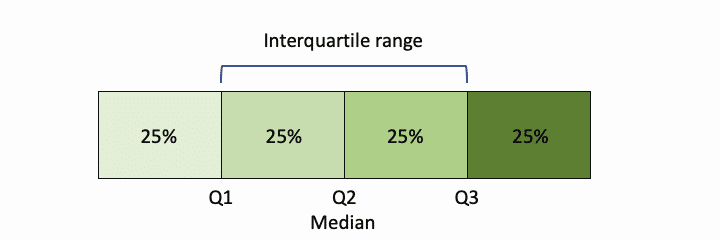

#### Exercise

Calculate Range and Inter Quartile Range with data below:

22, 23, 45, 12, 13, 24, 22, 46, 26, 27, 25, 23, 42

YOUR ANSWER HERE

### Boxplot

Human like creatures, most of the times, are bad at understanding pure numbers. Therefore, we need some way of vizualising dispersion measures above.

**Boxplot** or **box-and-whisker plot** is a good way of accomplishing this task. It captures:
* Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers
* Maximum (Q4 or 100th percentile): the highest data point in the data set excluding any outliers
* Median (Q2 or 50th percentile): the middle value in the data set
* First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.
* Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset.

### Interactive Boxplot
In the graph bellow you can drag points and see how Boxplot diagram changes as data points change. You can add more points or remove some in `line 6` bellow.
> Note that only x coordinates are taken into account, and y coordinates are ignored.

In [ ]:
%%jsxgraph -w 600 -h 300
JXG.Options.text.useMathJax = true;
var board = JXG.JSXGraph.initBoard('box', {boundingbox: [0, 6, 35, -4], axis:true,grid:true, keepaspectratio:false,  showCopyright:false});

//===========YOU CAN EDIT INITAL DATA HERE============
var data = [5, 15, 10, 7, 22, 14, 30, 19, 31, 24];
//====================================================

var points = []
data.forEach(function(elem, idx, arr) {
    points.push(board.create('point',[arr[idx], 2], {name:'', attractToGrid: true, attractorDistance: 1, snapSizeX: 1, highlightFillColor: 'red', highlightStrokeColor: 'red' }));
});

var b = board.create('boxplot', [[
                                  function(){return JXG.Math.Statistics.min(points.map((elem)=>elem.X()))},
                                  function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 25);},
                                  function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 50);},
                                  function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 75);},
                                  function() {return JXG.Math.Statistics.max(points.map((elem)=>elem.X()))}
                                ], 2, 2], {strokeWidth: 4, dir: 'horizontal'});

var q0Text = board.create('text', [function(){return JXG.Math.Statistics.min(points.map((elem)=>elem.X()))}, 3.5, "Q0"], {anchorX: 'middle'});
var q1Text = board.create('text', [function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 25);}, 3.5, "Q1"], {anchorX: 'middle'});
var q2Text = board.create('text', [function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 50);}, 3.5, "Q2"], {anchorX: 'middle'});
var q3Text = board.create('text', [function(){return JXG.Math.Statistics.percentile(points.map((elem)=>elem.X()).sort(), 75);}, 3.5, "Q3"], {anchorX: 'middle'});
var q4Text = board.create('text', [function() {return JXG.Math.Statistics.max(points.map((elem)=>elem.X()))}, 3.5, "Q4"], {anchorX: 'middle'});

### Variance

**Variance** measures the average difference between values within a group. It is preferred measure of difference due to some desirable properties and is pretty good when we need to know dispersion of whole dataset.

**What properties?** you may ask:
What if we want to understand if there are some points which are very far away? For example we have 2 datasets:
1. Points are spread out in range of 10-20.
2. Points are spread out in range of 14-16, but there are ~40% of data which is really far away from this range e.g. -20 or 50.

*IQR* will show that Set 2 has lower dispersion, but what if we want to know how close **all** points are? That is why we need Variance.

This means you have to figure out the variation between each data point relative to the mean. Therefore, the calculation of variance uses squares because it weighs outliers more heavily than data that appears closer to the mean. This calculation also prevents differences above the mean from canceling out those below, which would result in a variance of zero.

$$
\text{Variance: } \sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
$$

> see examples below for calculation examples

$\sigma$ is **Standard Deviation** and is equal to the square root of variance. It is also widely used measure in statistics and many other fields.

## Part II: Effect of Adding or Multipying the Data by a Constant on the Measure of Dispersion


Let's start by using numerical examples.  

**Data: 2, 3, 4, 5.**  

Now it is easy to give a numerical illustration of the formulas in the comments.

The sample mean is $\overline X=\frac{2+3+4+5}{4}=3.5$;

the sample variance is $\sigma^2=\frac{(2-3.5)^2+(3-3.5)^2+(4-3.5)^2+(5-3.5)^2}{4}=1.25$;

and the standard deviation is $\sigma_X=1.12$.

**Now we add 10 to observations: $Y_i=X_i+10$.**   

Then the sample mean is $\overline Y=13.5$;

the sample variance is $\sigma^2=\frac{(12-13.5)^2+(13-13.5)^2+(14-13.5)^2+(15-13.5)^2}{4}=1.25$;

and the standard deviation is $\sigma_Y=1.12$.

**If we multiply each of the original observation by 10: $W_i=10X_i$.**  

The results are now as follows: the sample mean is $\overline W=\frac{20+30+40+50}{40}=35$;

sample variance is $\sigma^2=\frac{(20-35)^2+(30-35)^2+(40-35)^2+(50-35)^2}{4}=125$;

and the standard deviation is $\sigma_Y=11.2$.

Bellow you can play with some data and see how variance changes as you add or multiply all points by some constants.

In [ ]:
%%jsxgraph -h 400 -w 600
JXG.Options.text.useMathJax = true;
var board = JXG.JSXGraph.initBoard('box', {boundingbox: [-35, 5, 35, -4], axis:true,grid:true, keepaspectratio:false,  showCopyright:false});

var data = [1, 2, 3, 4, 5, 6, 7, 8];
data.sort();

var s = board.create('slider', [[0, -1], [20, -1], [-10, 0, 10]], {snapWidth: 0.5, name: "Add"});
var m = board.create('slider', [[0, -2], [20, -2], [-5, 1, 5]], {snapWidth: 1, name: "Multiply by"});

data.forEach(function(elem, idx, arr) {
    board.create('point',[function() {return m.Value()*arr[idx]+s.Value()}, 0], {name:'', showInfoBox: false});
});

var displayData = board.create('text', [-15, 3, function() {
    return "Data: " + data.map((elem)=>(elem*m.Value()+s.Value()))
}], {fontSize: 20, cssStyle: 'background-color:rgb(255,255,255);padding:5pt'});

var text = board.create('text' ,[-15, 2.3, function() {
    var data2 = [];
    data.forEach(function(elem, idx, arr) {
        data2.push(m.Value()*arr[idx]+s.Value());
    });
    return "Variance: " + JXG.Math.Statistics.variance(data2);
}], {fontSize: 20, cssStyle: 'background-color:rgb(255,255,255);padding:5pt'});

#### Exercise:

You can try random data point each time. Re-run cell below to create new data of 5 points from 0 to 10 (uniform distribution).

What happens with variance when you add or multiply data by some constant?

YOUR ANSWER HERE

In [ ]:
%%jsxgraph -h 400 -w 600
JXG.Options.text.useMathJax = true;
var board = JXG.JSXGraph.initBoard('box', {boundingbox: [-35, 5, 35, -4], axis:true,grid:true, keepaspectratio:false,  showCopyright:false});



var data = Array.from({length: 5}, () => Math.floor(Math.random() * 11));
data = data.sort();

var s = board.create('slider', [[0, -1], [20, -1], [-10, 0, 10]], {snapWidth: 0.5, name: "Add"});
var m = board.create('slider', [[0, -2], [20, -2], [-5, 1, 5]], {snapWidth: 1, name: "Multiply by"});

data.forEach(function(elem, idx, arr) {
    board.create('point',[function() {return m.Value()*arr[idx]+s.Value()}, 0], {name:'', showInfoBox: false});
});

var displayData = board.create('text', [-15, 3, function() {
    return "Data: " + data.map((elem)=>(elem*m.Value()+s.Value()))
}], {fontSize: 20, cssStyle: 'background-color:rgb(255,255,255);padding:5pt'});
var text = board.create('text' ,[-15, 2.2, function() {
    var data2 = [];
    data.forEach(function(elem, idx, arr) {
        data2.push(m.Value()*arr[idx]+s.Value());
    });
    return "Variance: " + JXG.Math.Statistics.variance(data2);
}], {fontSize: 20, cssStyle: 'background-color:rgb(255,255,255);padding:5pt'});

### Effect of adding or multiplying the data by a constant  


As we can see from examples and exercises above, adding a constant to the data does not affect on the data's relative distance.  
When a constant $k$ is added to the data, 
- mean will be increased by $k$, 
- variance and standard deviation will be unchanged (the spread of the data is unchanged).

When the data is multiplied by the constant $k$,
- variance will be multiplied by factor of $k^2$;  
- mean and other dispersion measures will multiplied by $k$.